In [1]:
import time
from rdkit import Chem
from rdkit.Chem import AllChem, TorsionFingerprints
import json
import tqdm
import numpy as np

from utils import *

/home/tgog/.conda/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


_ColormakerRegistry()

In [3]:
def create_t_alkane(i):
    cin = 'C' * i
    m = Chem.MolFromSmiles(f'CCCC({cin})CCCC')
    m = Chem.rdmolops.AddHs(m)

    AllChem.EmbedMultipleConfs(m, numConfs=200, numThreads=-1)
    Chem.AllChem.MMFFOptimizeMoleculeConfs(m, numThreads=-1)


    confgen = ConformerGeneratorCustom(max_conformers=1, 
                      force_field='mmff',
                     pool_multiplier=1)  

    energys = confgen.get_conformer_energies(m)
    print(len(TorsionFingerprints.CalculateTorsionLists(m)[0]))
    standard = energys.min()
    total = np.sum(np.exp(-(energys-standard)))

    out = {
        'mol': Chem.MolToSmiles(m, isomericSmiles=False),
        'standard': standard,
        'total': total
    }
    
    return out


for i in range(4,14):
    out = create_t_alkane(i)
    with open(f'transfer_test_t_chain/{i}.json', 'w') as fp:
        json.dump(out, fp)
        Chem.MolToMolFile(new, f'{i}.mol')

        

8
9
10
11
12
13
14
15
16
17


In [14]:
i = 10 

cin = 'C' * i
m = Chem.MolFromSmiles(f'CCCC({cin})CCCC')
m = Chem.rdmolops.AddHs(m)

AllChem.EmbedMultipleConfs(m, numConfs=200, numThreads=-1)
Chem.AllChem.MMFFOptimizeMoleculeConfs(m, numThreads=-1)


confgen = ConformerGeneratorCustom(max_conformers=1, 
                  force_field='mmff',
                 pool_multiplier=1)  

energys = confgen.get_conformer_energies(m)
argsorted = np.argsort(energys)

new = Chem.Mol(mol)
new.RemoveAllConformers()
conf = m.GetConformer(int(argsorted[0]))
new.AddConformer(conf, assignId=True)


print(len(TorsionFingerprints.CalculateTorsionLists(m)[0]))
standard = energys.min()
total = np.sum(np.exp(-(energys-standard)))

out = {
    'mol': Chem.MolToSmiles(m, isomericSmiles=False),
    'standard': standard,
    'total': total
}


import py3Dmol
p = py3Dmol.view(width=800,height=800)
print(len(TorsionFingerprints.CalculateTorsionLists(m)[0]))
drawit(m, p, confId=int(argsorted[0]))


[ 6.17028745  5.6826097   6.23265778  7.04663408  7.63017555  4.55834531
  5.15938121  6.9160687   6.71957808  9.50155743  7.82173765  8.65419445
  5.45431487  5.28145859 12.02914617 12.0289859   5.31382661  4.22506991
  6.07418937  9.05841133  4.38922301  1.64240181  6.56016897 10.96364653
 11.41015157  9.32504929  3.47645543  3.61446483  7.45750952  7.1068722
  3.97149522 13.41070681  4.90105618  6.98853588  7.33702776  5.12958783
 10.06419355 13.08995767  5.63100331  7.92889351  6.30354232  3.93168267
  8.33773796 12.57071737  5.54494211  1.69769415  6.7396546   9.93437909
  4.30358195  3.92855145  9.88681435  7.33386332  5.98961514 10.37125917
  5.66741996  7.52956889  8.00032878  9.51922059 10.64303057 10.48836817
  6.38410354  6.95234505 12.43799544  2.47909692  7.07751322  8.86110884
  7.3378965   4.43494119  5.09133946  8.94245582  6.42425458  8.35948848
  4.84775466  6.59923875  8.28963837  9.19685779  5.58951493 10.39319694
  7.31532837  7.52811521  3.67114434  9.84899363  3.

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
def create_linear_alkane(i):
    m = Chem.MolFromSmiles('C' * i)
    m = Chem.rdmolops.AddHs(m)

    AllChem.EmbedMultipleConfs(m, numConfs=200, numThreads=-1)
    Chem.AllChem.MMFFOptimizeMoleculeConfs(m, numThreads=-1)


    confgen = ConformerGeneratorCustom(max_conformers=1, 
                      force_field='mmff',
                     pool_multiplier=1)  

    energys = confgen.get_conformer_energies(m)
    print(len(TorsionFingerprints.CalculateTorsionLists(m)[0]))
    standard = energys.min()
    total = np.sum(np.exp(-(energys-standard)))

    out = {
        'mol': Chem.MolToSmiles(m, isomericSmiles=False),
        'standard': standard,
        'total': total
    }
    
    return out


for i in range(10,15):
    out = create_linear_alkane(i)
    with open(f'transfer_test_straight_chain/{i}.json', 'w') as fp:
        json.dump(out, fp)
        

7
8
9
10
11


In [3]:
def create_branched():
    m = Chem.MolFromSmiles('CCCC')
    e = Chem.RWMol(m)

    numatoms = len(e.GetAtoms())
    tot = np.random.choice([15,16,17,18,19,20])
    while numatoms < tot:
        x = Chem.rdchem.Atom(6)
        randidx = np.random.randint(len(e.GetAtoms()))
        atom = e.GetAtomWithIdx(randidx)
        if atom.GetDegree() > 2:
            continue
        idx = e.AddAtom(x)
        e.AddBond(idx, randidx, Chem.rdchem.BondType.SINGLE)
        numatoms = len(e.GetAtoms())


    Chem.SanitizeMol(e)
    m = Chem.rdmolops.AddHs(e.GetMol())
    AllChem.EmbedMultipleConfs(m, numConfs=200, numThreads=-1)
    Chem.AllChem.MMFFOptimizeMoleculeConfs(m, numThreads=-1)


    confgen = ConformerGeneratorCustom(max_conformers=1, 
                     rmsd_threshold=None, 
                     force_field='mmff',
                     pool_multiplier=1)  

    energys = confgen.get_conformer_energies(m)
    print(len(TorsionFingerprints.CalculateTorsionLists(m)[0]))
    standard = energys.min()
    total = np.sum(np.exp(-(energys-standard)))
    
    out = {
        'mol': Chem.MolToSmiles(m, isomericSmiles=False),
        'standard': standard,
        'total': total
    }
    return out

In [ ]:
for i in tqdm(range(500)):
    out = create_branched()
    with open(f'bigger_labeled/{i}.json', 'w') as fp:
        json.dump(out, fp)



  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:07<1:03:41,  7.66s/it]

8




  0%|          | 2/500 [00:17<1:09:22,  8.36s/it]

11




  1%|          | 3/500 [00:26<1:09:30,  8.39s/it]

10




  1%|          | 4/500 [00:31<1:02:21,  7.54s/it]

9




  1%|          | 5/500 [00:41<1:08:57,  8.36s/it]

10




  1%|          | 6/500 [00:50<1:08:07,  8.28s/it]

7




  1%|▏         | 7/500 [00:57<1:05:49,  8.01s/it]

9




  2%|▏         | 8/500 [01:06<1:08:12,  8.32s/it]

9




  2%|▏         | 9/500 [01:17<1:15:35,  9.24s/it]

9




  2%|▏         | 10/500 [01:23<1:06:46,  8.18s/it]

7




  2%|▏         | 11/500 [01:34<1:13:06,  8.97s/it]

11




  2%|▏         | 12/500 [01:42<1:11:03,  8.74s/it]

7




  3%|▎         | 13/500 [01:52<1:13:30,  9.06s/it]

11




  3%|▎         | 14/500 [01:59<1:09:40,  8.60s/it]

9




  3%|▎         | 15/500 [02:05<1:02:06,  7.68s/it]

7




  3%|▎         | 16/500 [02:12<59:44,  7.41s/it]  

8




  3%|▎         | 17/500 [02:20<1:01:35,  7.65s/it]

7




  4%|▎         | 18/500 [02:25<56:04,  6.98s/it]  

8




  4%|▍         | 19/500 [02:32<55:00,  6.86s/it]

9




  4%|▍         | 20/500 [02:40<57:19,  7.17s/it]

8




  4%|▍         | 21/500 [02:46<55:32,  6.96s/it]

9




  4%|▍         | 22/500 [02:53<55:10,  6.93s/it]

7




  5%|▍         | 23/500 [03:04<1:03:59,  8.05s/it]

12




  5%|▍         | 24/500 [03:13<1:07:43,  8.54s/it]

10




  5%|▌         | 25/500 [03:25<1:13:58,  9.34s/it]

10




  5%|▌         | 26/500 [03:35<1:16:01,  9.62s/it]

11




  5%|▌         | 27/500 [03:46<1:19:51, 10.13s/it]

10




  6%|▌         | 28/500 [03:56<1:19:16, 10.08s/it]

10




  6%|▌         | 29/500 [04:03<1:11:15,  9.08s/it]

7




  6%|▌         | 30/500 [04:14<1:15:14,  9.61s/it]

10




  6%|▌         | 31/500 [04:19<1:05:37,  8.39s/it]

7




  6%|▋         | 32/500 [04:30<1:10:50,  9.08s/it]

13




  7%|▋         | 33/500 [04:37<1:06:46,  8.58s/it]

9




  7%|▋         | 34/500 [04:44<1:01:39,  7.94s/it]

9




  7%|▋         | 35/500 [04:50<56:11,  7.25s/it]  

7




  7%|▋         | 36/500 [04:58<59:06,  7.64s/it]

8




  7%|▋         | 37/500 [05:04<54:44,  7.09s/it]

7




  8%|▊         | 38/500 [05:13<58:38,  7.62s/it]

9




  8%|▊         | 39/500 [05:20<58:45,  7.65s/it]

9




  8%|▊         | 40/500 [05:33<1:08:46,  8.97s/it]

9




  8%|▊         | 41/500 [05:42<1:09:57,  9.14s/it]

12




  8%|▊         | 42/500 [05:49<1:04:35,  8.46s/it]

9




  9%|▊         | 43/500 [05:57<1:02:48,  8.25s/it]

9




  9%|▉         | 44/500 [06:03<58:41,  7.72s/it]  

9




  9%|▉         | 45/500 [06:12<1:00:28,  7.98s/it]

10




  9%|▉         | 46/500 [06:23<1:07:50,  8.97s/it]

10




  9%|▉         | 47/500 [06:31<1:04:42,  8.57s/it]

9




 10%|▉         | 48/500 [06:42<1:11:25,  9.48s/it]

12




 10%|▉         | 49/500 [06:52<1:11:46,  9.55s/it]

9




 10%|█         | 50/500 [07:01<1:10:24,  9.39s/it]

9




 10%|█         | 51/500 [07:13<1:15:09, 10.04s/it]

10




 10%|█         | 52/500 [07:21<1:11:03,  9.52s/it]

8




 11%|█         | 53/500 [07:30<1:09:18,  9.30s/it]

10




 11%|█         | 54/500 [07:39<1:08:30,  9.22s/it]

11




 11%|█         | 55/500 [07:47<1:05:26,  8.82s/it]

9




 11%|█         | 56/500 [07:52<57:46,  7.81s/it]  

7




 11%|█▏        | 57/500 [08:03<1:04:57,  8.80s/it]

12




 12%|█▏        | 58/500 [08:13<1:07:51,  9.21s/it]

9




 12%|█▏        | 59/500 [08:22<1:06:15,  9.01s/it]

10




 12%|█▏        | 60/500 [08:33<1:11:26,  9.74s/it]

10




 12%|█▏        | 61/500 [08:40<1:04:40,  8.84s/it]

7




 12%|█▏        | 62/500 [08:46<57:49,  7.92s/it]  

7




 13%|█▎        | 63/500 [08:55<59:24,  8.16s/it]

8




 13%|█▎        | 64/500 [09:05<1:03:44,  8.77s/it]

10




 13%|█▎        | 65/500 [09:15<1:06:32,  9.18s/it]

9




 13%|█▎        | 66/500 [09:26<1:10:27,  9.74s/it]

10




 13%|█▎        | 67/500 [09:33<1:05:08,  9.03s/it]

9




 14%|█▎        | 68/500 [09:39<57:56,  8.05s/it]  

8




 14%|█▍        | 69/500 [09:45<52:25,  7.30s/it]

8




 14%|█▍        | 70/500 [09:51<51:11,  7.14s/it]

8




 14%|█▍        | 71/500 [10:02<59:01,  8.25s/it]

11




 14%|█▍        | 72/500 [10:14<1:05:29,  9.18s/it]

10




 15%|█▍        | 73/500 [10:22<1:04:25,  9.05s/it]

9




 15%|█▍        | 74/500 [10:32<1:05:00,  9.16s/it]

12




 15%|█▌        | 75/500 [10:37<57:22,  8.10s/it]  

9




 15%|█▌        | 76/500 [10:49<1:04:26,  9.12s/it]

10




 15%|█▌        | 77/500 [10:57<1:02:52,  8.92s/it]

11




 16%|█▌        | 78/500 [11:07<1:04:35,  9.18s/it]

10




 16%|█▌        | 79/500 [11:13<56:45,  8.09s/it]  

9




 16%|█▌        | 80/500 [11:24<1:03:01,  9.00s/it]

12




 16%|█▌        | 81/500 [11:31<1:00:04,  8.60s/it]

9




 16%|█▋        | 82/500 [11:39<57:53,  8.31s/it]  

9




 17%|█▋        | 83/500 [11:48<58:11,  8.37s/it]

9




 17%|█▋        | 84/500 [11:57<1:01:09,  8.82s/it]

11




 17%|█▋        | 85/500 [12:05<58:10,  8.41s/it]  

8




 17%|█▋        | 86/500 [12:17<1:04:55,  9.41s/it]

11




 17%|█▋        | 87/500 [12:24<59:36,  8.66s/it]  

7




 18%|█▊        | 88/500 [12:30<55:02,  8.01s/it]

8




 18%|█▊        | 89/500 [12:37<52:07,  7.61s/it]

9




 18%|█▊        | 90/500 [12:42<47:24,  6.94s/it]

9




 18%|█▊        | 91/500 [12:48<44:15,  6.49s/it]

9




 18%|█▊        | 92/500 [12:56<48:03,  7.07s/it]

10




 19%|█▊        | 93/500 [13:03<47:59,  7.07s/it]

10




 19%|█▉        | 94/500 [13:09<44:33,  6.59s/it]

8




 19%|█▉        | 95/500 [13:15<44:20,  6.57s/it]

8




 19%|█▉        | 96/500 [13:25<50:46,  7.54s/it]

10




 19%|█▉        | 97/500 [13:36<58:49,  8.76s/it]

9




 20%|█▉        | 98/500 [13:42<52:37,  7.85s/it]

7




 20%|█▉        | 99/500 [13:52<56:00,  8.38s/it]

9




 20%|██        | 100/500 [14:02<58:51,  8.83s/it]

11




 20%|██        | 101/500 [14:10<58:18,  8.77s/it]

11




 20%|██        | 102/500 [14:20<1:00:38,  9.14s/it]

10




 21%|██        | 103/500 [14:26<53:43,  8.12s/it]  

7




 21%|██        | 104/500 [14:36<57:18,  8.68s/it]

9




 21%|██        | 105/500 [14:47<1:02:13,  9.45s/it]

11




 21%|██        | 106/500 [14:53<54:32,  8.31s/it]  

7




 21%|██▏       | 107/500 [15:04<59:50,  9.14s/it]

10




 22%|██▏       | 108/500 [15:10<52:53,  8.10s/it]

7




 22%|██▏       | 109/500 [15:16<49:54,  7.66s/it]

8




 22%|██▏       | 110/500 [15:24<49:44,  7.65s/it]

8




 22%|██▏       | 111/500 [15:35<56:53,  8.78s/it]

9




 22%|██▏       | 112/500 [15:47<1:01:23,  9.49s/it]

11




 23%|██▎       | 113/500 [15:55<59:57,  9.29s/it]  

9




 23%|██▎       | 114/500 [16:05<1:01:21,  9.54s/it]

10




 23%|██▎       | 115/500 [16:12<55:27,  8.64s/it]  

8




 23%|██▎       | 116/500 [16:19<51:18,  8.02s/it]

8




 23%|██▎       | 117/500 [16:25<48:13,  7.56s/it]

8




 24%|██▎       | 118/500 [16:35<52:55,  8.31s/it]

10




 24%|██▍       | 119/500 [16:41<47:53,  7.54s/it]

8




 24%|██▍       | 120/500 [16:51<51:53,  8.19s/it]

11




 24%|██▍       | 121/500 [16:56<46:41,  7.39s/it]

9




 24%|██▍       | 122/500 [17:05<49:43,  7.89s/it]

9




 25%|██▍       | 123/500 [17:14<51:07,  8.14s/it]

11




 25%|██▍       | 124/500 [17:24<54:25,  8.69s/it]

11




 25%|██▌       | 125/500 [17:34<56:16,  9.00s/it]

10




 25%|██▌       | 126/500 [17:44<57:53,  9.29s/it]

10




 25%|██▌       | 127/500 [17:50<52:36,  8.46s/it]

9




 26%|██▌       | 128/500 [17:59<53:04,  8.56s/it]

10




 26%|██▌       | 129/500 [18:06<50:58,  8.24s/it]

9




 26%|██▌       | 130/500 [18:16<53:47,  8.72s/it]

11




 26%|██▌       | 131/500 [18:22<49:08,  7.99s/it]

8




 26%|██▋       | 132/500 [18:30<48:08,  7.85s/it]

10




 27%|██▋       | 133/500 [18:36<45:30,  7.44s/it]

9




 27%|██▋       | 134/500 [18:47<50:21,  8.26s/it]

9




 27%|██▋       | 135/500 [18:52<45:39,  7.51s/it]

8




 27%|██▋       | 136/500 [18:59<44:16,  7.30s/it]

8




 27%|██▋       | 137/500 [19:05<41:14,  6.82s/it]

7




 28%|██▊       | 138/500 [19:15<47:23,  7.85s/it]

9




 28%|██▊       | 139/500 [19:26<51:56,  8.63s/it]

10




 28%|██▊       | 140/500 [19:37<57:18,  9.55s/it]

10




 28%|██▊       | 141/500 [19:47<58:07,  9.72s/it]

11




 28%|██▊       | 142/500 [19:53<51:03,  8.56s/it]

7




 29%|██▊       | 143/500 [20:04<54:36,  9.18s/it]

10




 29%|██▉       | 144/500 [20:09<47:54,  8.07s/it]

8




 29%|██▉       | 145/500 [20:19<50:58,  8.62s/it]

11




 29%|██▉       | 146/500 [20:30<54:56,  9.31s/it]

10




 29%|██▉       | 147/500 [20:38<52:36,  8.94s/it]

9




 30%|██▉       | 148/500 [20:45<48:42,  8.30s/it]

7




 30%|██▉       | 149/500 [20:51<43:41,  7.47s/it]

8




 30%|███       | 150/500 [21:02<50:27,  8.65s/it]

9




 30%|███       | 151/500 [21:12<53:00,  9.11s/it]

9




 30%|███       | 152/500 [21:19<49:25,  8.52s/it]

10




 31%|███       | 153/500 [21:28<49:18,  8.53s/it]

10




 31%|███       | 154/500 [21:33<43:54,  7.61s/it]

8




 31%|███       | 155/500 [21:40<41:44,  7.26s/it]

9




 31%|███       | 156/500 [21:49<45:41,  7.97s/it]

10




 31%|███▏      | 157/500 [21:59<48:37,  8.51s/it]

12




 32%|███▏      | 158/500 [22:08<49:39,  8.71s/it]

12




 32%|███▏      | 159/500 [22:15<45:48,  8.06s/it]

7




 32%|███▏      | 160/500 [22:24<46:34,  8.22s/it]

10




 32%|███▏      | 161/500 [22:34<49:50,  8.82s/it]

10




 32%|███▏      | 162/500 [22:44<52:25,  9.31s/it]

11




 33%|███▎      | 163/500 [22:55<54:11,  9.65s/it]

10




 33%|███▎      | 164/500 [23:03<52:26,  9.36s/it]

10




 33%|███▎      | 165/500 [23:13<52:03,  9.32s/it]

9




 33%|███▎      | 166/500 [23:23<54:12,  9.74s/it]

9




 33%|███▎      | 167/500 [23:34<56:09, 10.12s/it]

12




 34%|███▎      | 168/500 [23:41<50:05,  9.05s/it]

8




 34%|███▍      | 169/500 [23:51<51:35,  9.35s/it]

10




 34%|███▍      | 170/500 [23:58<48:13,  8.77s/it]

11




 34%|███▍      | 171/500 [24:04<42:31,  7.76s/it]

8




 34%|███▍      | 172/500 [24:15<47:52,  8.76s/it]

11




 35%|███▍      | 173/500 [24:25<49:23,  9.06s/it]

10




 35%|███▍      | 174/500 [24:33<48:15,  8.88s/it]

10




 35%|███▌      | 175/500 [24:42<48:27,  8.95s/it]

9




 35%|███▌      | 176/500 [24:53<51:34,  9.55s/it]

10




 35%|███▌      | 177/500 [24:59<46:07,  8.57s/it]

9




 36%|███▌      | 178/500 [25:07<44:25,  8.28s/it]

9




 36%|███▌      | 179/500 [25:18<48:26,  9.06s/it]

11




 36%|███▌      | 180/500 [25:25<44:50,  8.41s/it]

8




 36%|███▌      | 181/500 [25:36<49:27,  9.30s/it]

11




 36%|███▋      | 182/500 [25:46<50:13,  9.48s/it]

10




 37%|███▋      | 183/500 [25:58<53:24, 10.11s/it]

11




 37%|███▋      | 184/500 [26:08<53:06, 10.08s/it]

9




 37%|███▋      | 185/500 [26:14<47:12,  8.99s/it]

8




 37%|███▋      | 186/500 [26:20<41:39,  7.96s/it]

8




 37%|███▋      | 187/500 [26:31<46:40,  8.95s/it]

10




 38%|███▊      | 188/500 [26:40<47:21,  9.11s/it]

11




 38%|███▊      | 189/500 [26:47<43:01,  8.30s/it]

9




 38%|███▊      | 190/500 [26:55<43:22,  8.39s/it]

9




 38%|███▊      | 191/500 [27:03<41:58,  8.15s/it]

10




 38%|███▊      | 192/500 [27:12<42:41,  8.32s/it]

9




 39%|███▊      | 193/500 [27:17<38:32,  7.53s/it]

8




 39%|███▉      | 194/500 [27:26<40:19,  7.91s/it]

9




 39%|███▉      | 195/500 [27:32<36:39,  7.21s/it]

6




 39%|███▉      | 196/500 [27:40<38:20,  7.57s/it]

10




 39%|███▉      | 197/500 [27:50<41:58,  8.31s/it]

11




 40%|███▉      | 198/500 [27:59<42:44,  8.49s/it]

9




 40%|███▉      | 199/500 [28:10<46:12,  9.21s/it]

9




 40%|████      | 200/500 [28:18<44:12,  8.84s/it]

8




 40%|████      | 201/500 [28:26<43:21,  8.70s/it]

11




 40%|████      | 202/500 [28:33<40:15,  8.11s/it]

8




 41%|████      | 203/500 [28:42<41:28,  8.38s/it]

9




 41%|████      | 204/500 [28:50<40:37,  8.23s/it]

9




 41%|████      | 205/500 [28:57<39:05,  7.95s/it]

8




 41%|████      | 206/500 [29:03<36:16,  7.40s/it]

7




 41%|████▏     | 207/500 [29:12<37:57,  7.77s/it]

10




 42%|████▏     | 208/500 [29:18<34:42,  7.13s/it]

6




 42%|████▏     | 209/500 [29:24<33:56,  7.00s/it]

6




 42%|████▏     | 210/500 [29:30<31:55,  6.61s/it]

8




 42%|████▏     | 211/500 [29:37<31:44,  6.59s/it]

8




 42%|████▏     | 212/500 [29:42<30:04,  6.27s/it]

7




 43%|████▎     | 213/500 [29:48<29:14,  6.11s/it]

9




 43%|████▎     | 214/500 [29:55<31:03,  6.52s/it]

10




 43%|████▎     | 215/500 [30:01<29:44,  6.26s/it]

7




 43%|████▎     | 216/500 [30:10<33:19,  7.04s/it]

8




 43%|████▎     | 217/500 [30:18<35:28,  7.52s/it]

9




 44%|████▎     | 218/500 [30:25<33:37,  7.15s/it]

9




 44%|████▍     | 219/500 [30:32<33:13,  7.10s/it]

9




 44%|████▍     | 220/500 [30:39<33:43,  7.23s/it]

11




 44%|████▍     | 221/500 [30:47<34:11,  7.35s/it]

9




 44%|████▍     | 222/500 [30:58<39:11,  8.46s/it]

12




 45%|████▍     | 223/500 [31:04<36:21,  7.88s/it]

7




 45%|████▍     | 224/500 [31:12<35:49,  7.79s/it]

8




 45%|████▌     | 225/500 [31:21<37:00,  8.08s/it]

10




 45%|████▌     | 226/500 [31:27<34:11,  7.49s/it]

7




 45%|████▌     | 227/500 [31:38<38:57,  8.56s/it]

11




 46%|████▌     | 228/500 [31:48<40:30,  8.94s/it]

10




 46%|████▌     | 229/500 [31:59<43:13,  9.57s/it]

10




 46%|████▌     | 230/500 [32:06<39:43,  8.83s/it]

8




 46%|████▌     | 231/500 [32:13<37:01,  8.26s/it]

7




 46%|████▋     | 232/500 [32:22<37:49,  8.47s/it]

10




 47%|████▋     | 233/500 [32:27<33:45,  7.58s/it]

7




 47%|████▋     | 234/500 [32:39<39:15,  8.86s/it]

11




 47%|████▋     | 235/500 [32:50<41:23,  9.37s/it]

10




 47%|████▋     | 236/500 [32:55<36:18,  8.25s/it]

7




 47%|████▋     | 237/500 [33:02<34:12,  7.80s/it]

9




 48%|████▊     | 238/500 [33:10<34:27,  7.89s/it]

8




 48%|████▊     | 239/500 [33:21<38:05,  8.76s/it]

10




 48%|████▊     | 240/500 [33:31<39:56,  9.22s/it]

11




 48%|████▊     | 241/500 [33:37<35:01,  8.11s/it]

8




 48%|████▊     | 242/500 [33:47<37:34,  8.74s/it]

9




 49%|████▊     | 243/500 [33:52<33:08,  7.74s/it]

9




 49%|████▉     | 244/500 [34:02<35:59,  8.44s/it]

10




 49%|████▉     | 245/500 [34:08<32:14,  7.59s/it]

7




 49%|████▉     | 246/500 [34:18<35:27,  8.37s/it]

10




 49%|████▉     | 247/500 [34:24<31:36,  7.50s/it]

8




 50%|████▉     | 248/500 [34:32<32:05,  7.64s/it]

8




 50%|████▉     | 249/500 [34:43<36:11,  8.65s/it]

11




 50%|█████     | 250/500 [34:53<37:32,  9.01s/it]

10




 50%|█████     | 251/500 [35:00<35:44,  8.61s/it]

8




 50%|█████     | 252/500 [35:08<34:16,  8.29s/it]

9




 51%|█████     | 253/500 [35:13<30:47,  7.48s/it]

9




 51%|█████     | 254/500 [35:22<32:05,  7.83s/it]

9




 51%|█████     | 255/500 [35:31<33:49,  8.28s/it]

11




 51%|█████     | 256/500 [35:41<35:02,  8.62s/it]

11




 51%|█████▏    | 257/500 [35:50<35:09,  8.68s/it]

9




 52%|█████▏    | 258/500 [35:55<31:07,  7.72s/it]

8




 52%|█████▏    | 259/500 [36:03<30:44,  7.65s/it]

9




 52%|█████▏    | 260/500 [36:11<31:46,  7.94s/it]

9




 52%|█████▏    | 261/500 [36:17<28:36,  7.18s/it]

9




 52%|█████▏    | 262/500 [36:22<26:43,  6.74s/it]

9




 53%|█████▎    | 263/500 [36:33<31:32,  7.99s/it]

12




 53%|█████▎    | 264/500 [36:39<28:27,  7.23s/it]

8




 53%|█████▎    | 265/500 [36:44<26:26,  6.75s/it]

7




 53%|█████▎    | 266/500 [36:53<29:08,  7.47s/it]

9




 53%|█████▎    | 267/500 [37:02<30:35,  7.88s/it]

9




 54%|█████▎    | 268/500 [37:11<31:52,  8.24s/it]

8




 54%|█████▍    | 269/500 [37:23<35:14,  9.16s/it]

10




 54%|█████▍    | 270/500 [37:34<37:49,  9.87s/it]

10




 54%|█████▍    | 271/500 [37:43<36:33,  9.58s/it]

10




 54%|█████▍    | 272/500 [37:50<33:19,  8.77s/it]

9




 55%|█████▍    | 273/500 [37:57<31:06,  8.22s/it]

8




 55%|█████▍    | 274/500 [38:09<34:47,  9.24s/it]

10




 55%|█████▌    | 275/500 [38:20<37:29, 10.00s/it]

9




 55%|█████▌    | 276/500 [38:32<38:54, 10.42s/it]

9




 55%|█████▌    | 277/500 [38:38<34:20,  9.24s/it]

8




 56%|█████▌    | 278/500 [38:47<33:51,  9.15s/it]

9




 56%|█████▌    | 279/500 [38:57<34:47,  9.45s/it]

10




 56%|█████▌    | 280/500 [39:04<31:34,  8.61s/it]

8




 56%|█████▌    | 281/500 [39:11<29:19,  8.03s/it]

8




 56%|█████▋    | 282/500 [39:22<32:46,  9.02s/it]

12




 57%|█████▋    | 283/500 [39:28<29:10,  8.07s/it]

6




 57%|█████▋    | 284/500 [39:37<29:50,  8.29s/it]

9




 57%|█████▋    | 285/500 [39:47<31:57,  8.92s/it]

10




 57%|█████▋    | 286/500 [39:56<32:09,  9.02s/it]

8




 57%|█████▋    | 287/500 [40:03<29:42,  8.37s/it]

9




 58%|█████▊    | 288/500 [40:13<31:33,  8.93s/it]

10




 58%|█████▊    | 289/500 [40:25<34:13,  9.73s/it]

11




 58%|█████▊    | 290/500 [40:31<30:43,  8.78s/it]

8




 58%|█████▊    | 291/500 [40:43<33:36,  9.65s/it]

11




 58%|█████▊    | 292/500 [40:55<35:16, 10.17s/it]

11




 59%|█████▊    | 293/500 [41:01<31:25,  9.11s/it]

8




 59%|█████▉    | 294/500 [41:07<28:00,  8.16s/it]

6




 59%|█████▉    | 295/500 [41:15<27:27,  8.04s/it]

9




 59%|█████▉    | 296/500 [41:25<29:33,  8.69s/it]

10




 59%|█████▉    | 297/500 [41:37<32:15,  9.53s/it]

12




 60%|█████▉    | 298/500 [41:47<33:19,  9.90s/it]

12




 60%|█████▉    | 299/500 [41:54<29:58,  8.95s/it]

7




 60%|██████    | 300/500 [42:05<31:38,  9.49s/it]

10




 60%|██████    | 301/500 [42:12<28:54,  8.72s/it]

7




 60%|██████    | 302/500 [42:22<30:20,  9.19s/it]

10




 61%|██████    | 303/500 [42:29<27:28,  8.37s/it]

9




 61%|██████    | 304/500 [42:34<24:41,  7.56s/it]

9




 61%|██████    | 305/500 [42:43<26:11,  8.06s/it]

8




 61%|██████    | 306/500 [42:49<23:36,  7.30s/it]

9




 61%|██████▏   | 307/500 [42:58<24:46,  7.70s/it]

10




 62%|██████▏   | 308/500 [43:06<24:52,  7.77s/it]

8




 62%|██████▏   | 309/500 [43:11<23:01,  7.24s/it]

7




 62%|██████▏   | 310/500 [43:23<26:42,  8.43s/it]

10




 62%|██████▏   | 311/500 [43:29<24:41,  7.84s/it]

8




 62%|██████▏   | 312/500 [43:39<26:08,  8.34s/it]

8




 63%|██████▎   | 313/500 [43:49<27:40,  8.88s/it]

9




 63%|██████▎   | 314/500 [43:56<26:11,  8.45s/it]

8




 63%|██████▎   | 315/500 [44:04<24:59,  8.10s/it]

8




 63%|██████▎   | 316/500 [44:11<24:40,  8.05s/it]

10




 63%|██████▎   | 317/500 [44:20<25:19,  8.30s/it]

11




 64%|██████▎   | 318/500 [44:26<22:53,  7.54s/it]

8




 64%|██████▍   | 319/500 [44:33<22:01,  7.30s/it]

8




 64%|██████▍   | 320/500 [44:41<22:15,  7.42s/it]

9




 64%|██████▍   | 321/500 [44:48<22:27,  7.53s/it]

10




 64%|██████▍   | 322/500 [44:57<23:09,  7.81s/it]

9




 65%|██████▍   | 323/500 [45:02<21:04,  7.15s/it]

8




 65%|██████▍   | 324/500 [45:12<23:25,  7.99s/it]

11




 65%|██████▌   | 325/500 [45:23<26:01,  8.93s/it]

11




 65%|██████▌   | 326/500 [45:29<23:12,  8.00s/it]

7




 65%|██████▌   | 327/500 [45:37<22:43,  7.88s/it]

8




 66%|██████▌   | 328/500 [45:44<22:08,  7.72s/it]

11




 66%|██████▌   | 329/500 [45:53<22:52,  8.02s/it]

11




 66%|██████▌   | 330/500 [45:59<20:39,  7.29s/it]

8




 66%|██████▌   | 331/500 [46:07<21:06,  7.50s/it]

9




 66%|██████▋   | 332/500 [46:17<23:19,  8.33s/it]

10




 67%|██████▋   | 333/500 [46:24<22:32,  8.10s/it]

9




 67%|██████▋   | 334/500 [46:31<20:58,  7.58s/it]

8




 67%|██████▋   | 335/500 [46:42<23:56,  8.71s/it]

12




 67%|██████▋   | 336/500 [46:49<22:08,  8.10s/it]

7




 67%|██████▋   | 337/500 [46:57<21:43,  7.99s/it]

9




 68%|██████▊   | 338/500 [47:06<23:08,  8.57s/it]

11




 68%|██████▊   | 339/500 [47:14<22:20,  8.33s/it]

9




 68%|██████▊   | 340/500 [47:23<22:31,  8.44s/it]

10




 68%|██████▊   | 341/500 [47:33<23:39,  8.93s/it]

11




 68%|██████▊   | 342/500 [47:40<21:37,  8.21s/it]

9




 69%|██████▊   | 343/500 [47:47<20:45,  7.93s/it]

9




 69%|██████▉   | 344/500 [47:54<20:14,  7.79s/it]

8




 69%|██████▉   | 345/500 [48:06<22:52,  8.85s/it]

10




 69%|██████▉   | 346/500 [48:17<24:48,  9.66s/it]

10




 69%|██████▉   | 347/500 [48:24<22:07,  8.68s/it]

9




 70%|██████▉   | 348/500 [48:34<23:07,  9.13s/it]

9




 70%|██████▉   | 349/500 [48:40<20:59,  8.34s/it]

9




 70%|███████   | 350/500 [48:49<21:08,  8.45s/it]

10




 70%|███████   | 351/500 [48:57<20:36,  8.30s/it]

7




 70%|███████   | 352/500 [49:05<20:00,  8.11s/it]

10




 71%|███████   | 353/500 [49:16<22:27,  9.17s/it]

11




 71%|███████   | 354/500 [49:22<20:05,  8.25s/it]

10




 71%|███████   | 355/500 [49:30<19:25,  8.04s/it]

9




 71%|███████   | 356/500 [49:35<17:33,  7.31s/it]

8




 71%|███████▏  | 357/500 [49:45<19:17,  8.10s/it]

10




 72%|███████▏  | 358/500 [49:54<19:35,  8.28s/it]

9




 72%|███████▏  | 359/500 [50:00<17:46,  7.57s/it]

7




 72%|███████▏  | 360/500 [50:08<18:18,  7.85s/it]

10




 72%|███████▏  | 361/500 [50:17<18:56,  8.18s/it]

9




 72%|███████▏  | 362/500 [50:26<18:49,  8.18s/it]

8




 73%|███████▎  | 363/500 [50:33<18:25,  8.07s/it]

9




 73%|███████▎  | 364/500 [50:42<18:43,  8.26s/it]

9




 73%|███████▎  | 365/500 [50:49<17:39,  7.85s/it]

7




 73%|███████▎  | 366/500 [50:59<18:55,  8.47s/it]

10




 73%|███████▎  | 367/500 [51:04<16:44,  7.55s/it]

8




 74%|███████▎  | 368/500 [51:11<15:58,  7.26s/it]

7




 74%|███████▍  | 369/500 [51:19<16:22,  7.50s/it]

8




 74%|███████▍  | 370/500 [51:25<15:29,  7.15s/it]

9




 74%|███████▍  | 371/500 [51:33<15:54,  7.40s/it]

9




 74%|███████▍  | 372/500 [51:40<15:22,  7.21s/it]

8




 75%|███████▍  | 373/500 [51:51<17:34,  8.30s/it]

11




 75%|███████▍  | 374/500 [51:58<16:34,  7.89s/it]

7




 75%|███████▌  | 375/500 [52:08<17:45,  8.52s/it]

10




 75%|███████▌  | 376/500 [52:19<19:31,  9.45s/it]

10




 75%|███████▌  | 377/500 [52:27<17:58,  8.77s/it]

8




 76%|███████▌  | 378/500 [52:35<17:48,  8.75s/it]

10




 76%|███████▌  | 379/500 [52:45<18:07,  8.98s/it]

8




 76%|███████▌  | 380/500 [52:53<17:36,  8.81s/it]

9




 76%|███████▌  | 381/500 [53:03<18:05,  9.13s/it]

10




 76%|███████▋  | 382/500 [53:09<16:02,  8.15s/it]

8




 77%|███████▋  | 383/500 [53:16<15:06,  7.75s/it]

9




 77%|███████▋  | 384/500 [53:27<16:55,  8.75s/it]

10




 77%|███████▋  | 385/500 [53:35<16:10,  8.44s/it]

8




 77%|███████▋  | 386/500 [53:43<16:07,  8.49s/it]

10




 77%|███████▋  | 387/500 [53:50<14:50,  7.88s/it]

10




 78%|███████▊  | 388/500 [53:55<13:31,  7.24s/it]

9




 78%|███████▊  | 389/500 [54:05<14:47,  7.99s/it]

10




 78%|███████▊  | 390/500 [54:16<16:21,  8.92s/it]

11




 78%|███████▊  | 391/500 [54:23<15:05,  8.31s/it]

8




 78%|███████▊  | 392/500 [54:33<15:46,  8.77s/it]

10




 79%|███████▊  | 393/500 [54:41<15:07,  8.49s/it]

8




 79%|███████▉  | 394/500 [54:51<15:56,  9.02s/it]

10




 79%|███████▉  | 395/500 [55:02<16:59,  9.71s/it]

10




 79%|███████▉  | 396/500 [55:08<14:42,  8.48s/it]

7




 79%|███████▉  | 397/500 [55:16<14:12,  8.27s/it]

9




 80%|███████▉  | 398/500 [55:26<14:51,  8.74s/it]

11




 80%|███████▉  | 399/500 [55:37<16:04,  9.55s/it]

11




 80%|████████  | 400/500 [55:43<13:59,  8.40s/it]

7




 80%|████████  | 401/500 [55:51<13:52,  8.41s/it]

12




 80%|████████  | 402/500 [55:58<12:54,  7.91s/it]

7




 81%|████████  | 403/500 [56:05<12:19,  7.62s/it]

7




 81%|████████  | 404/500 [56:12<11:43,  7.33s/it]

9




 81%|████████  | 405/500 [56:21<12:36,  7.96s/it]

10




 81%|████████  | 406/500 [56:30<12:52,  8.21s/it]

10




 81%|████████▏ | 407/500 [56:42<14:22,  9.28s/it]

11




 82%|████████▏ | 408/500 [56:50<13:49,  9.02s/it]

8




 82%|████████▏ | 409/500 [56:59<13:47,  9.09s/it]

11




 82%|████████▏ | 410/500 [57:05<12:14,  8.16s/it]

7




 82%|████████▏ | 411/500 [57:14<12:24,  8.36s/it]

9




 82%|████████▏ | 412/500 [57:24<12:59,  8.86s/it]

9




 83%|████████▎ | 413/500 [57:32<12:24,  8.56s/it]

7




 83%|████████▎ | 414/500 [57:41<12:24,  8.65s/it]

10




 83%|████████▎ | 415/500 [57:52<13:15,  9.36s/it]

10




 83%|████████▎ | 416/500 [57:58<11:55,  8.52s/it]

8




 83%|████████▎ | 417/500 [58:06<11:24,  8.25s/it]

8




 84%|████████▎ | 418/500 [58:18<12:39,  9.27s/it]

10




 84%|████████▍ | 419/500 [58:25<11:36,  8.60s/it]

6




 84%|████████▍ | 420/500 [58:31<10:40,  8.01s/it]

9




 84%|████████▍ | 421/500 [58:41<11:17,  8.57s/it]

11




 84%|████████▍ | 422/500 [58:50<11:24,  8.78s/it]

10




 85%|████████▍ | 423/500 [58:59<11:13,  8.74s/it]

10




 85%|████████▍ | 424/500 [59:07<10:44,  8.48s/it]

9




 85%|████████▌ | 425/500 [59:17<11:17,  9.03s/it]

10




 85%|████████▌ | 426/500 [59:29<12:02,  9.76s/it]

9




 85%|████████▌ | 427/500 [59:40<12:31, 10.29s/it]

10




 86%|████████▌ | 428/500 [59:46<10:48,  9.01s/it]

7




 86%|████████▌ | 429/500 [59:58<11:37,  9.82s/it]

11




 86%|████████▌ | 430/500 [1:00:08<11:38,  9.98s/it]

10




 86%|████████▌ | 431/500 [1:00:20<12:09, 10.57s/it]

11




 86%|████████▋ | 432/500 [1:00:28<10:55,  9.63s/it]

10




 87%|████████▋ | 433/500 [1:00:39<11:20, 10.15s/it]

9




 87%|████████▋ | 434/500 [1:00:51<11:47, 10.71s/it]

10




 87%|████████▋ | 435/500 [1:01:02<11:42, 10.80s/it]

12




 87%|████████▋ | 436/500 [1:01:08<09:57,  9.34s/it]

7




 87%|████████▋ | 437/500 [1:01:14<08:44,  8.32s/it]

7




 88%|████████▊ | 438/500 [1:01:23<08:47,  8.50s/it]

9




 88%|████████▊ | 439/500 [1:01:29<07:47,  7.66s/it]

8




 88%|████████▊ | 440/500 [1:01:34<07:06,  7.10s/it]

8




 88%|████████▊ | 441/500 [1:01:41<06:52,  6.99s/it]

8




 88%|████████▊ | 442/500 [1:01:50<07:18,  7.57s/it]

9




 89%|████████▊ | 443/500 [1:02:01<08:15,  8.70s/it]

10




 89%|████████▉ | 444/500 [1:02:13<08:50,  9.48s/it]

12




 89%|████████▉ | 445/500 [1:02:22<08:41,  9.49s/it]

8




 89%|████████▉ | 446/500 [1:02:30<08:04,  8.98s/it]

8




 89%|████████▉ | 447/500 [1:02:37<07:16,  8.24s/it]

9




 90%|████████▉ | 448/500 [1:02:43<06:42,  7.75s/it]

9




 90%|████████▉ | 449/500 [1:02:54<07:16,  8.57s/it]

9




 90%|█████████ | 450/500 [1:03:00<06:40,  8.01s/it]

8




 90%|█████████ | 451/500 [1:03:10<06:54,  8.47s/it]

11




 90%|█████████ | 452/500 [1:03:17<06:21,  7.94s/it]

7




 91%|█████████ | 453/500 [1:03:22<05:41,  7.26s/it]

7




 91%|█████████ | 454/500 [1:03:29<05:26,  7.11s/it]

9




 91%|█████████ | 455/500 [1:03:39<05:54,  7.88s/it]

10




 91%|█████████ | 456/500 [1:03:50<06:35,  8.99s/it]

9




 91%|█████████▏| 457/500 [1:04:01<06:46,  9.44s/it]

11




 92%|█████████▏| 458/500 [1:04:13<07:14, 10.36s/it]

10




 92%|█████████▏| 459/500 [1:04:20<06:16,  9.19s/it]

8




 92%|█████████▏| 460/500 [1:04:27<05:41,  8.54s/it]

9




 92%|█████████▏| 461/500 [1:04:36<05:36,  8.63s/it]

8




 92%|█████████▏| 462/500 [1:04:47<05:58,  9.42s/it]

11




 93%|█████████▎| 463/500 [1:04:58<06:08,  9.97s/it]

9




 93%|█████████▎| 464/500 [1:05:07<05:41,  9.50s/it]

9




 93%|█████████▎| 465/500 [1:05:13<05:02,  8.64s/it]

7




 93%|█████████▎| 466/500 [1:05:21<04:50,  8.54s/it]

8




 93%|█████████▎| 467/500 [1:05:34<05:18,  9.66s/it]

11




 94%|█████████▎| 468/500 [1:05:41<04:42,  8.82s/it]

8




 94%|█████████▍| 469/500 [1:05:51<04:51,  9.40s/it]

10




 94%|█████████▍| 470/500 [1:05:59<04:29,  8.97s/it]

8




 94%|█████████▍| 471/500 [1:06:07<04:12,  8.71s/it]

8




 94%|█████████▍| 472/500 [1:06:16<03:58,  8.52s/it]

7




 95%|█████████▍| 473/500 [1:06:21<03:27,  7.69s/it]

9




 95%|█████████▍| 474/500 [1:06:30<03:25,  7.92s/it]

7




 95%|█████████▌| 475/500 [1:06:40<03:39,  8.76s/it]

12




 95%|█████████▌| 476/500 [1:06:46<03:09,  7.90s/it]

8




 95%|█████████▌| 477/500 [1:06:55<03:08,  8.19s/it]

9




 96%|█████████▌| 478/500 [1:07:04<03:03,  8.33s/it]

10




 96%|█████████▌| 479/500 [1:07:14<03:06,  8.88s/it]

10




 96%|█████████▌| 480/500 [1:07:23<02:59,  8.97s/it]

10




 96%|█████████▌| 481/500 [1:07:33<02:55,  9.22s/it]

10




 96%|█████████▋| 482/500 [1:07:43<02:50,  9.50s/it]

10




 97%|█████████▋| 483/500 [1:07:53<02:43,  9.64s/it]

10




 97%|█████████▋| 484/500 [1:07:59<02:15,  8.49s/it]

7




 97%|█████████▋| 485/500 [1:08:09<02:15,  9.02s/it]

10


In [ ]:
create_branched()

In [21]:
confgen = ConformerGeneratorCustom(max_conformers=1, 
                 rmsd_threshold=None, 
                 force_field='mmff',
                 pool_multiplier=1)

one = 'COc1cc(C2OCC3C(c4ccc([O])c(OC)c4)OCC23)ccc1[O]'
two = 'COc1cc(C2Oc3c(OC)cc(C=CCO)cc3C2CO)ccc1[O]'
twoprime = 'COc1cc(C2Oc3c(OC)cc(C=CCO)cc3C2CO)ccc1O'
three = 'COc1cc(C2Oc3c(OC)cc(C(O)C(CO)Oc4ccc(C=CCO)cc4OC)cc3C2CO)ccc1[O]'
threeprime = 'COc1cc(C2Oc3c(OC)cc(C(O)C(CO)Oc4ccc(C=CCO)cc4OC)cc3C2CO)ccc1O'
# four = 'COc1cc(C(O)C(CO)Oc2ccc(C(O)C(CO)Oc3ccc(C(O)C(CO)Oc4ccc(C=CCO)cc4OC)cc3OC)cc2OC)ccc1[O]'
# ten = 'COc1cc(C2Oc3c(OC)cc(C4Oc5c(OC)cc(C(O)C(CO)Oc6ccc(C7OCC8C(c9cc(OC)c%10c(c9)C(CO)C(c9cc(OC)c%11c(c9)C(CO)C(c9ccc(O)c(OC)c9)O%11)O%10)OCC78)cc6OC)cc5C4CO)cc3C2CO)ccc1[O].COc1cc(C2Oc3c(OC)cc(C4Oc5c(OC)cc(C=CCO)cc5C4CO)cc3C2CO)ccc1O'
# nine = 'COc1cc(C(O)C(CO)Oc2ccc(C3OCC4C(c5cc(OC)c6c(c5)C(CO)C(c5ccc(OC(CO)C(O)c7cc(OC)c8c(c7)C(CO)C(c7ccc([O])c(OC)c7)O8)c(OC)c5)O6)OCC34)cc2OC)ccc1[O].COc1cc(C2Oc3c(OC)cc(C4Oc5c(OC)cc(C=CCO)cc5C4CO)cc3C2CO)ccc1O'
eight = 'COc1cc(C(O)C(CO)Oc2c(OC)cc(C(O)C(CO)Oc3ccc(C4Oc5c(OC)cc(C6Oc7c(OC)cc(C8Oc9c(OC)cc(C=CCO)cc9C8CO)cc7C6CO)cc5C4CO)cc3OC)cc2-c2cc(C3OCC4C(c5ccc(O)c(OC)c5)OCC34)cc(OC)c2[O])ccc1[O]'
eightprime = 'COc1cc(C(O)C(CO)Oc2c(OC)cc(C(O)C(CO)Oc3ccc(C4Oc5c(OC)cc(C6Oc7c(OC)cc(C8Oc9c(OC)cc(C=CCO)cc9C8CO)cc7C6CO)cc5C4CO)cc3OC)cc2-c2cc(C3OCC4C(c5ccc(O)c(OC)c5)OCC34)cc(OC)c2O)ccc1O'

x = Chem.MolFromSmiles(eightprime)
x = Chem.AddHs(x)
res = AllChem.EmbedMultipleConfs(x, numConfs=10, numThreads=-1)
Chem.AllChem.MMFFOptimizeMoleculeConfs(x, numThreads=-1)
confgen.get_conformer_energies(x).min()

465.71138953929045

In [20]:
import py3Dmol
p = py3Dmol.view(width=800,height=800)
print(len(TorsionFingerprints.CalculateTorsionLists(x)[0]))
drawit(x, p, confId=0)

30


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
nonring, ring = Chem.TorsionFingerprints.CalculateTorsionLists(mol)
all_tors = [Chem.TorsionFingerprints.CalculateTorsionAngles(mol, nonring, ring, confId=i) for i in range(200)]

In [11]:
# mol = Chem.MolFromSmiles('CC(CCC)CCCC(CCCC)CC')
# standard = 7.678142433712216
import json

with open('huge_hc_set/10_6288.json') as fp:
    o = json.load(fp)
print(o)
mol = Chem.MolFromSmiles(o['mol'])
standard = o['standard']
mol = Chem.AddHs(mol)
res = AllChem.EmbedMultipleConfs(mol, numConfs=200, numThreads=-1)
res = AllChem.MMFFOptimizeMoleculeConfs(mol, numThreads=-1)


{'mol': '[H]C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])(C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])C([H])(C([H])([H])C([H])([H])[H])C([H])(C([H])([H])[H])C([H])([H])C([H])([H])[H]', 'standard': 20.600833362255234, 'total': 8.948187614383007}


In [36]:
confgen.get_conformer_energies(mol)

array([26.78947154, 30.90847928, 34.27148507, 25.41744492, 25.7696764 ,
       27.72020753, 30.72263714, 28.50492589, 30.08653013, 26.01060769,
       24.13174466, 21.13461998, 28.30585824, 27.42462701, 28.90876123,
       30.06590153, 26.87286995, 34.439083  , 23.57029031, 25.69864001,
       21.30998421, 27.77209526, 28.21171852, 28.52219055, 24.4703803 ,
       25.22538227, 24.17206467, 24.9470656 , 25.11290061, 26.81183229,
       29.47719842, 25.29692926, 22.87383542, 24.12212574, 25.09552535,
       29.61044842, 30.15927543, 25.63472999, 20.18490462, 29.66992207,
       25.88784466, 29.73943554, 24.59750325, 25.6089271 , 27.8662055 ,
       22.69698615, 25.8471065 , 28.55572948, 28.16758353, 25.94795477,
       25.12579815, 24.90591745, 24.15914884, 25.73888884, 28.75526538,
       28.40091827, 32.30138371, 25.96664152, 26.41129336, 26.18695488,
       26.60474275, 28.69961524, 29.09428614, 23.43593629, 25.34308867,
       23.94089815, 24.33250808, 24.25294576, 22.6983252 , 38.45

In [18]:
%timeit tfd = array_to_lower_triangle(Chem.TorsionFingerprints.GetTFDMatrix(mol, useWeights=False), True)

110 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%timeit tfd = Chem.TorsionFingerprints.GetTFDBetweenConformers(mol, range(0,mol.GetNumConformers() - 1), [-1], useWeights=False)


11.3 ms ± 18.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
%timeit confgen.get_conformer_energies(mol)

264 ms ± 3.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
out = confgen.get_conformer_energies(mol)
out = sorted(out)
for idx, i in enumerate(out):
    print(idx, i)

0 20.184904623488855
1 20.83284080599911
2 20.921058260791376
3 21.029520740052845
4 21.10634415035851
5 21.134619976207897
6 21.30998421047018
7 21.835924511334795
8 22.032265869816555
9 22.069043316355593
10 22.148668781483593
11 22.16735387358701
12 22.26402388372506
13 22.427396256265556
14 22.532588805710112
15 22.5482447091328
16 22.66077096836782
17 22.696986145150976
18 22.698325201408508
19 22.765966357842558
20 22.773451313506424
21 22.866499586201208
22 22.867418329406156
23 22.873835416058984
24 22.890533479605597
25 22.91520112810189
26 22.992978713823028
27 23.03815606321889
28 23.074591632039862
29 23.07609374044991
30 23.093062110873454
31 23.435936290337743
32 23.570290309073467
33 23.573276805782104
34 23.595654826844513
35 23.74378020589037
36 23.810743577142752
37 23.940898150521058
38 23.960382183998377
39 24.092230264229617
40 24.122125738809874
41 24.13174466453666
42 24.15914883710214
43 24.17206466611584
44 24.202537056382212
45 24.221796495795143
46 24.2529457

In [32]:
import py3Dmol
p = py3Dmol.view(width=800,height=800)
drawit(Chem.RemoveHs(mol), p, confId=0)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [13]:
import pickle
with open('test_mol.pickle', 'rb') as fp:
    mol = pickle.load(fp)
    
import py3Dmol
p = py3Dmol.view(width=800,height=800)
drawit(mol, p, confId=0)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

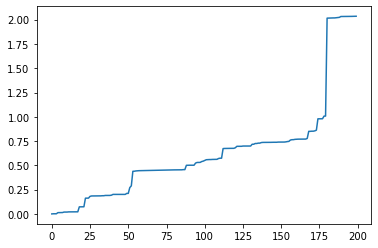

In [15]:
plt.plot(np.cumsum(1.4 * np.exp(-(menergys - 14.88278294332602))) / 1.2363186365185044)

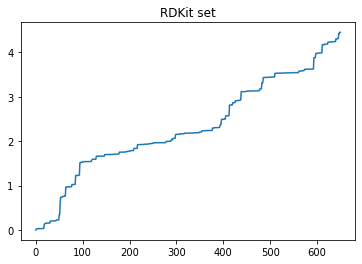

In [16]:
mol = Chem.MolFromMolFile('258-trihexyl-decane.mol')
standard = 14.88278294332602
mol = Chem.AddHs(mol)
res = AllChem.EmbedMultipleConfs(mol, numConfs=650, numThreads=-1, pruneRmsThresh=1.0)
res = AllChem.MMFFOptimizeMoleculeConfs(mol, numThreads=-1)


energys = confgen.get_conformer_energies(mol)
plt.title('RDKit set')
plt.plot(np.cumsum(0.9 * np.exp(-(energys - 14.88278294332602))) / 1.2363186365185044)

Text(0, 0.5, 'Normalized Gibbs')

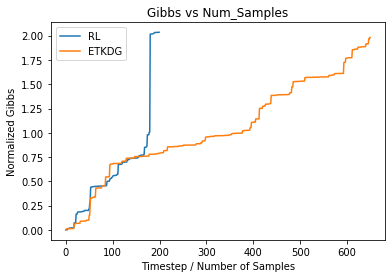

In [21]:
plt.plot(np.cumsum(1.4 * np.exp(-(menergys - 14.88278294332602))) / 1.2363186365185044, label='RL')
plt.plot(np.cumsum(0.4 * np.exp(-(energys - 14.88278294332602))) / 1.2363186365185044, label='ETKDG')
plt.legend()
plt.title('Gibbs vs Num_Samples')
plt.xlabel('Timestep / Number of Samples')
plt.ylabel('Normalized Gibbs')

ValueError: cannot convert float NaN to integer

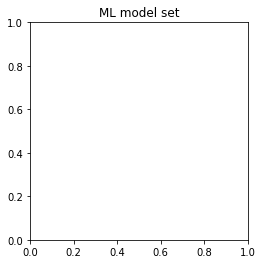

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('ML model set')
plt.pie(np.sort(np.exp(-(energys - energys.max()))))

([<matplotlib.patches.Wedge at 0x2ac642575240>,
 [Text(1.1, 2.730563113146859e-13, ''),
  Text(1.1, 2.0893457834361553e-09, ''),
  Text(1.0999999999999999, 1.1824645602298179e-08, ''),
  Text(1.0999999999999994, 3.7092810148445196e-08, ''),
  Text(1.0999999999999972, 8.028528213983659e-08, ''),
  Text(1.0999999999999914, 1.3858275371129565e-07, ''),
  Text(1.0999999999999808, 2.0656553942925003e-07, ''),
  Text(1.0999999999999592, 2.9977126473477193e-07, ''),
  Text(1.0999999999998917, 4.880458872624331e-07, ''),
  Text(1.0999999999996315, 9.005142188936129e-07, ''),
  Text(1.099999999999017, 1.4705707073377435e-06, ''),
  Text(1.0999999999980226, 2.0857569930293164e-06, ''),
  Text(1.0999999999963306, 2.8412538776837175e-06, ''),
  Text(1.0999999999931367, 3.885794431628412e-06, ''),
  Text(1.0999999999841628, 5.902722846558123e-06, ''),
  Text(1.0999999999639742, 8.902623331171481e-06, ''),
  Text(1.09999999993261, 1.2176129274967843e-05, ''),
  Text(1.0999999998901409, 1.55463911239

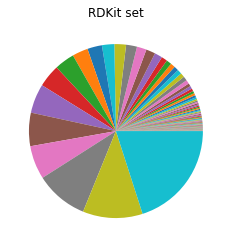

In [8]:
mol = Chem.MolFromMolFile('258-trihexyl-decane.mol')
standard = 14.88278294332602
mol = Chem.AddHs(mol)
res = AllChem.EmbedMultipleConfs(mol, numConfs=200, numThreads=-1)
res = AllChem.MMFFOptimizeMoleculeConfs(mol, numThreads=-1)

energys = confgen.get_conformer_energies(mol)
plt.title('RDKit set')
plt.pie(np.sort(np.exp(-(energys - energys.max()))))